# Model Selection
Regina Ceballos

147663

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing

## Lectura y estandarización de datos

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLinPoli2.csv")

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('y', axis=1), df[['y']], train_size=0.75)
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
scalerX = preprocessing.StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)
scalerY = preprocessing.StandardScaler().fit(Y_train)
Y_train = scalerY.transform(Y_train)
Y_test = scalerY.transform(Y_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Regresión Iterativa Regularizada

In [4]:
def salida(w,X):
    return X.dot(w[1:]) +w[0]

In [5]:
def entrena(X, y, w, la, eta = 0.01):
    for i in range(len(X)):
        error = y[i] - salida(w, X[i])
        w[0] = w[0] + eta * (error)
        w[1:] = w[1:] + eta * (error*X[i]) - la * w[1:]
    return w

### Función de Error

In [6]:
def calcError(X, Y, w):
    return np.mean((X.dot(w[1:])+ w[0] - Y)**2)

## Cross-validation

In [7]:
def subsets(X, k):
    I = np.random.choice(len(X), len(X), False)
    return [I[i] % k for i in range(len(X))]

In [8]:
def crossval(X_train, Y_train, w, k, la):
    S = np.array(subsets(X_train, k))
    err = []
    for j in range(k):
        Xtr, Ytr, Xtst, Ytst = X_train[S != j], Y_train[S != j], X_train[S == j], Y_train[S == j]
        w = entrena(Xtr, Ytr, w, la)
        err = np.append(err, calcError(Xtst, Ytst.flatten(), w))
    errprom = np.mean(err)
    return w, errprom

## Prueba con datos

In [9]:
la = np.linspace(0.0, 1.0, 100)
errprom = []
for i in range(len(la)):
    w = np.asarray([rnd.random() for j in range(len(X_train[0]) + 1)])
    w, err = crossval(X_train, Y_train, w, 10, la[i])
    errprom = np.append(errprom, err)

### Búsqueda del error mínimo y lambda óptima

In [10]:
errmin = np.amin(errprom)
lamin = np.argmin(errprom)
print la[lamin], errmin

0.0 0.537076509188


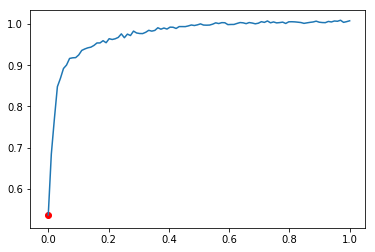

In [11]:
plt.plot(la, errprom)
plt.scatter(la[lamin], errmin, c='r')
plt.show()

Tras correr la función de cross-validation con diferentes valores de lambda, podemos ver que el error mínimo es 0.6057 y se alcanza con lambda = 0.0; es decir, es mejor no utilizar regularización.

## Entrenamiento con lambda óptima

In [12]:
w = np.asarray([rnd.random() for i in range(len(X_train[0]) + 1)])
for i in range(len(X_train)):
    w = entrena(X_train, Y_train, w, la[lamin])

In [13]:
print calcError(X_train, Y_train.flatten(), w)
print calcError(X_test, Y_test.flatten(), w)

0.491507177284
0.489306635399
